## quantitative analysis for META


In [1]:
from load import load_data
from indicators import indicators
from indicators import summary
from q_plot import quantiattive
import pandas as pd
import yfinance as yf
import talib
import matplotlib.pyplot as plt

In [2]:
df=load_data(r'C:\Users\ASUS VIVO\Desktop\data\AMZN_historical_data.csv')

Prepare Your Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6846 non-null   object 
 1   Open          6846 non-null   float64
 2   High          6846 non-null   float64
 3   Low           6846 non-null   float64
 4   Close         6846 non-null   float64
 5   Adj Close     6846 non-null   float64
 6   Volume        6846 non-null   int64  
 7   Dividends     6846 non-null   float64
 8   Stock Splits  6846 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 481.5+ KB


In [4]:
df['Date']=pd.to_datetime(df['Date'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6846 entries, 0 to 6845
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          6846 non-null   datetime64[ns]
 1   Open          6846 non-null   float64       
 2   High          6846 non-null   float64       
 3   Low           6846 non-null   float64       
 4   Close         6846 non-null   float64       
 5   Adj Close     6846 non-null   float64       
 6   Volume        6846 non-null   int64         
 7   Dividends     6846 non-null   float64       
 8   Stock Splits  6846 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 481.5 KB


Calculate Basic Technical Indicators

In [6]:
indicators(data=df,open='Open',high='High',low='Low',close='Close')


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6841,2024-07-24,183.199997,185.449997,180.410004,180.830002,180.830002,41532400,0.0,0.0,193.393999,...,181.102941,206.668353,195.516000,184.363647,203.340572,190.755000,178.169429,205.556585,192.8900,180.223416
6842,2024-07-25,182.910004,183.899994,176.800003,179.850006,179.850006,44464200,0.0,0.0,193.193499,...,180.367369,207.221332,194.970999,182.720666,204.153160,190.282001,176.410841,206.074765,192.2020,178.329236
6843,2024-07-26,180.389999,183.190002,180.240005,182.500000,182.500000,29506000,0.0,0.0,192.462499,...,178.516240,207.188993,194.138499,181.088006,203.990890,189.584001,175.177112,205.666265,191.4345,177.202735
6844,2024-07-29,183.839996,184.750000,182.380005,183.199997,183.199997,33270100,0.0,0.0,191.767999,...,177.559233,206.906302,193.433499,179.960696,203.748148,189.078001,174.407855,205.575610,190.9320,176.288390


summary for the data

In [7]:
summary(data=df)

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_open,RSI_open,...,Lower_Band_open,Upper_Band_high,Middle_Band_high,Lower_Band_high,Upper_Band_low,Middle_Band_low,Lower_Band_low,Upper_Band_close,Middle_Band_close,Lower_Band_close
count,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6.846000e+03,6846.0,6846.000000,6827.000000,6832.000000,...,6827.000000,6827.000000,6827.000000,6827.000000,6827.000000,6827.000000,6827.000000,6827.000000,6827.000000,6827.000000
mean,37.360464,37.801009,36.882561,37.351096,37.351096,1.380713e+08,0.0,0.003944,37.203660,53.418026,...,34.765981,40.030315,37.643183,35.256052,39.158890,36.728826,34.298761,39.630163,37.196212,34.762262
std,53.756955,54.366449,53.087051,53.729913,53.729913,1.382346e+08,0.0,0.246789,53.470131,11.923879,...,50.189865,57.392920,54.081366,50.859414,56.159883,52.805668,49.548402,56.818898,53.448083,50.172394
min,0.070313,0.072396,0.065625,0.069792,0.069792,9.744000e+06,0.0,0.000000,0.077188,16.438279,...,0.053200,0.085625,0.078854,0.052519,0.080643,0.074102,0.054443,0.082733,0.076589,0.052393
25%,2.070125,2.120625,2.040156,2.076750,2.076750,6.505442e+07,0.0,0.000000,2.090697,44.667009,...,1.856397,2.339775,2.138913,1.888520,2.261522,2.044744,1.826997,2.300706,2.093047,1.856935
50%,8.574500,8.666750,8.466500,8.591500,8.591500,1.020650e+08,0.0,0.000000,8.599950,53.740142,...,7.929471,9.307611,8.702125,8.070441,9.104074,8.493675,7.837836,9.193683,8.603600,7.956449
75%,50.453876,50.723249,50.059875,50.426500,50.426500,1.567560e+08,0.0,0.000000,50.325750,61.976719,...,47.863302,53.391652,50.708600,48.288453,52.341782,49.876700,47.149605,52.843275,50.294788,47.762002
max,200.089996,201.199997,199.050003,200.000000,200.000000,2.086584e+09,0.0,20.000000,194.064499,92.193101,...,183.705778,207.221332,196.056000,186.667090,204.153160,191.393501,180.533798,206.074765,193.598500,183.018610


In [8]:
column=summary(data=df).columns.tolist()
column

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close',
 'Volume',
 'Dividends',
 'Stock Splits',
 'SMA_open',
 'RSI_open',
 'SMA_high',
 'RSI_high',
 'SMA_low',
 'RSI_low',
 'SMA_close',
 'RSI_close',
 'Upper_Band_open',
 'Middle_Band_open',
 'Lower_Band_open',
 'Upper_Band_high',
 'Middle_Band_high',
 'Lower_Band_high',
 'Upper_Band_low',
 'Middle_Band_low',
 'Lower_Band_low',
 'Upper_Band_close',
 'Middle_Band_close',
 'Lower_Band_close']

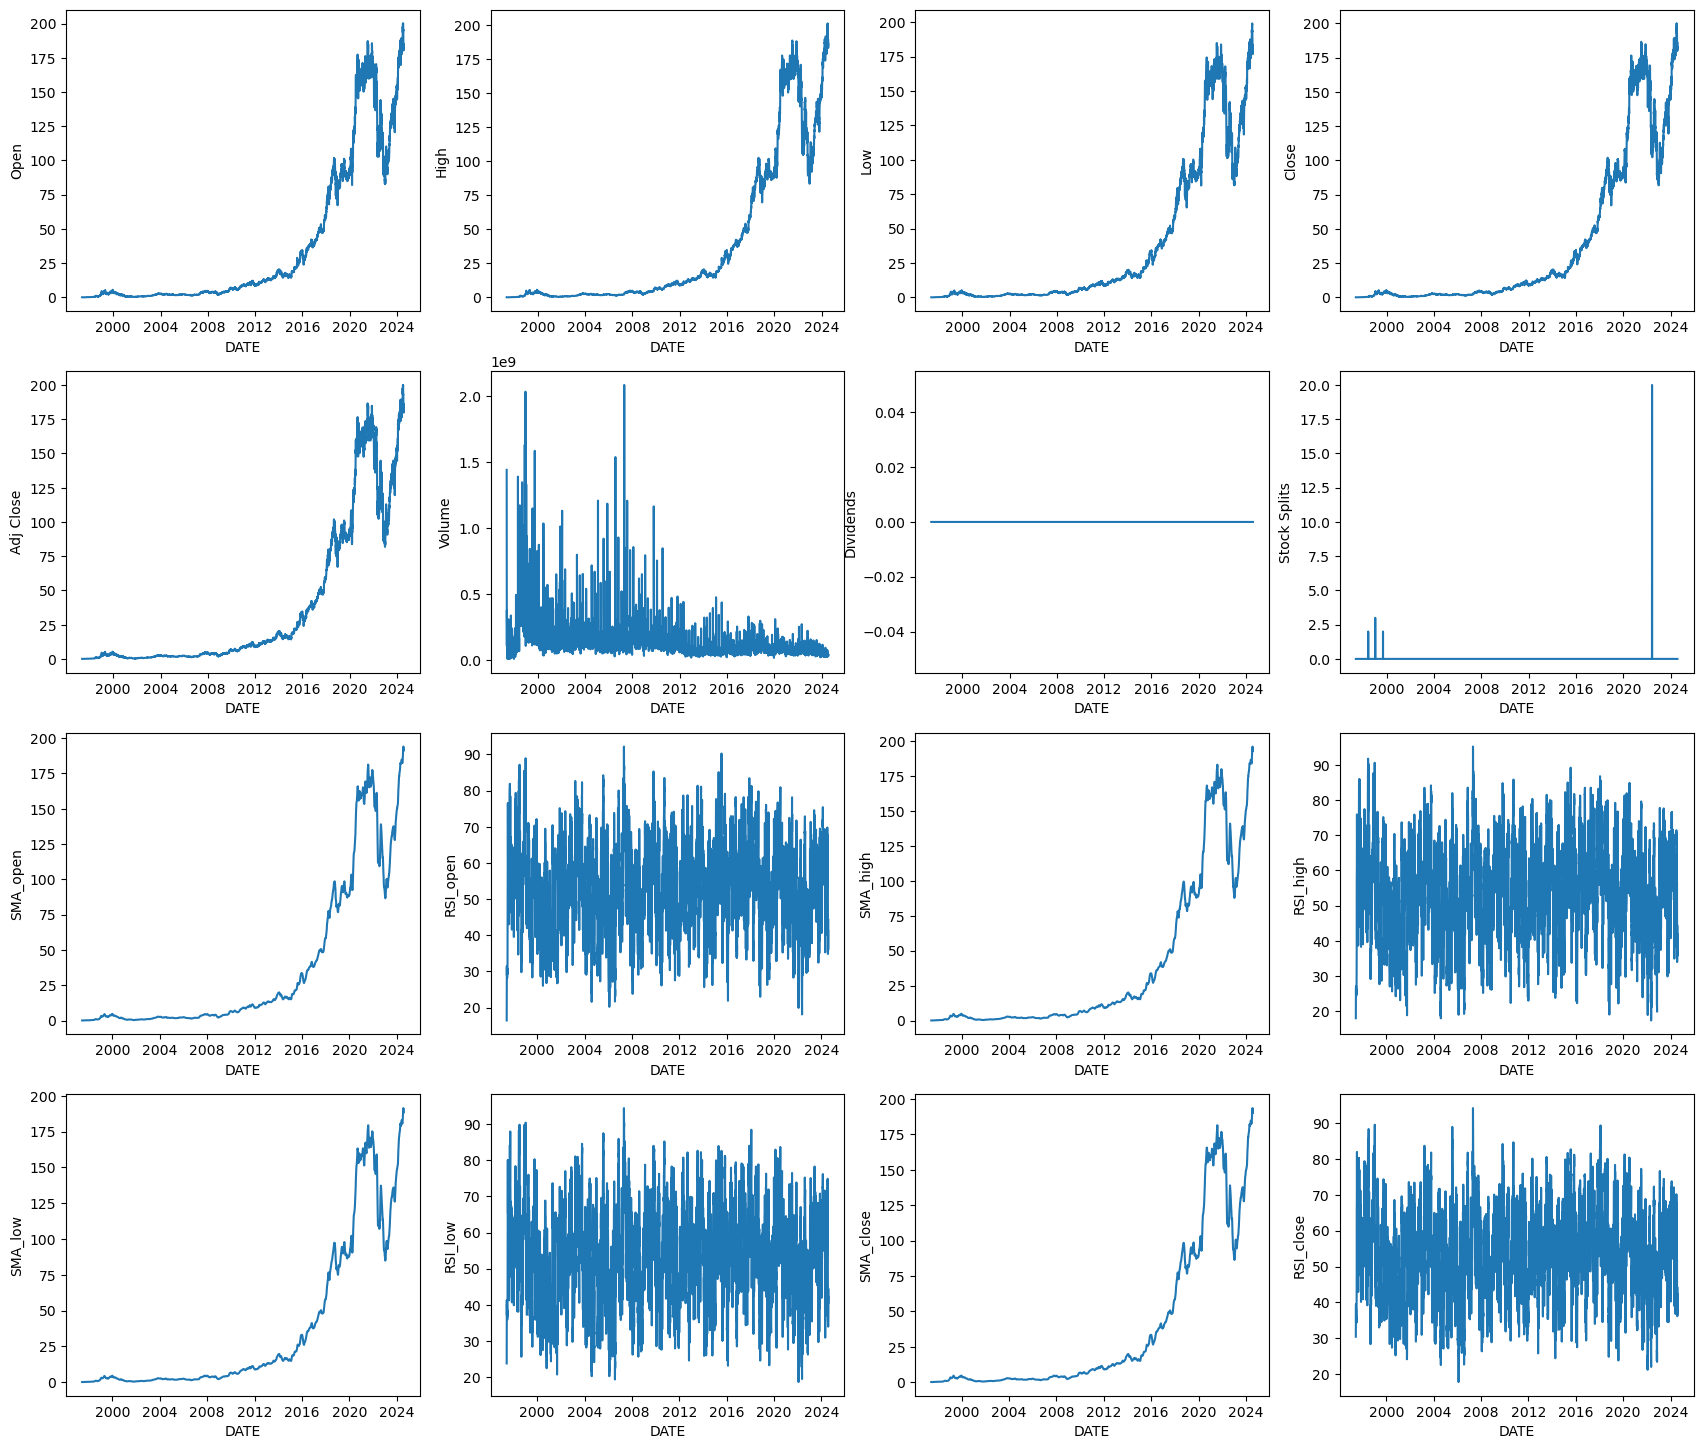

In [9]:
quantiattive(data=df,column=column)